In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import os
import numpy as np
import glob
import pydicom
from scipy.ndimage import zoom
from sklearn.model_selection import KFold
import random
import re

# Validation MRI MYO

['nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetPlans__2d/fold_0/validation/WHSMR_0x0.nii.gz', 'nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetPlans__2d/fold_0/validation/WHSMR_0x1.nii.gz', 'nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetPlans__2d/fold_0/validation/WHSMR_0x10.nii.gz', 'nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetPlans__2d/fold_0/validation/WHSMR_0x11.nii.gz', 'nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetPlans__2d/fold_0/validation/WHSMR_0x12.nii.gz', 'nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetPlans__2d/fold_0/validation/WHSMR_0x13.nii.gz', 'nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetPlans__2d/fold_0/validation/WHSMR_0x14.nii.gz', 'nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetPlans__2d/fold_0/validation/WHSMR_0x15.nii.gz', 'nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetPlans__2d/fold_0/validation/WHSMR_0x2.nii.gz', 'nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNet

<Figure size 640x480 with 0 Axes>

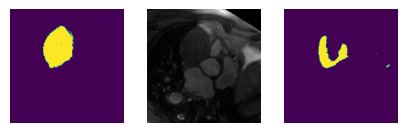

/data/groups/public/archive/radiology/multimodal_raw/Dataset034_MMWHSMRI/imagesTr/WHSMR_0x10_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset034_MMWHSMRI/labelsTr/WHSMR_0x1.nii.gz nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetPlans__2d/fold_0/validation/WHSMR_0x1.nii.gz
(220, 220)
(220, 220, 1)
(220, 220, 1)


<Figure size 640x480 with 0 Axes>

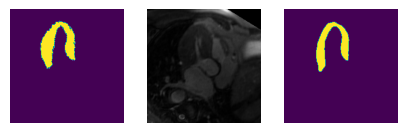

/data/groups/public/archive/radiology/multimodal_raw/Dataset034_MMWHSMRI/imagesTr/WHSMR_0x11_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset034_MMWHSMRI/labelsTr/WHSMR_0x10.nii.gz nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetPlans__2d/fold_0/validation/WHSMR_0x10.nii.gz
(220, 220)
(220, 220, 1)
(220, 220, 1)


<Figure size 640x480 with 0 Axes>

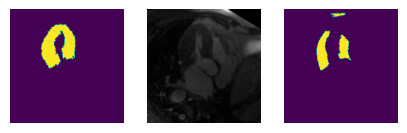

/data/groups/public/archive/radiology/multimodal_raw/Dataset034_MMWHSMRI/imagesTr/WHSMR_0x12_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset034_MMWHSMRI/labelsTr/WHSMR_0x11.nii.gz nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetPlans__2d/fold_0/validation/WHSMR_0x11.nii.gz
(220, 220)
(220, 220, 1)
(220, 220, 1)


<Figure size 640x480 with 0 Axes>

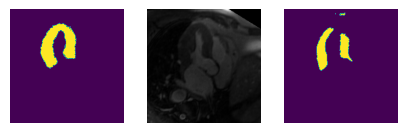

/data/groups/public/archive/radiology/multimodal_raw/Dataset034_MMWHSMRI/imagesTr/WHSMR_0x13_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset034_MMWHSMRI/labelsTr/WHSMR_0x12.nii.gz nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetPlans__2d/fold_0/validation/WHSMR_0x12.nii.gz
(220, 220)
(220, 220, 1)
(220, 220, 1)


<Figure size 640x480 with 0 Axes>

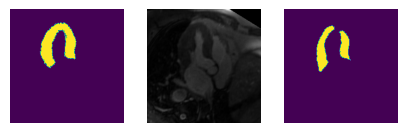

/data/groups/public/archive/radiology/multimodal_raw/Dataset034_MMWHSMRI/imagesTr/WHSMR_0x14_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset034_MMWHSMRI/labelsTr/WHSMR_0x13.nii.gz nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetPlans__2d/fold_0/validation/WHSMR_0x13.nii.gz
(220, 220)
(220, 220, 1)
(220, 220, 1)


<Figure size 640x480 with 0 Axes>

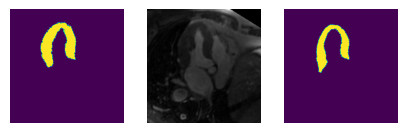

/data/groups/public/archive/radiology/multimodal_raw/Dataset034_MMWHSMRI/imagesTr/WHSMR_0x15_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset034_MMWHSMRI/labelsTr/WHSMR_0x14.nii.gz nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetPlans__2d/fold_0/validation/WHSMR_0x14.nii.gz
(220, 220)
(220, 220, 1)
(220, 220, 1)


<Figure size 640x480 with 0 Axes>

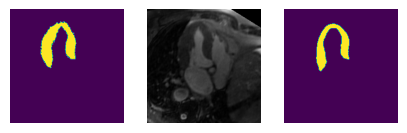

/data/groups/public/archive/radiology/multimodal_raw/Dataset034_MMWHSMRI/imagesTr/WHSMR_0x1_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset034_MMWHSMRI/labelsTr/WHSMR_0x15.nii.gz nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetPlans__2d/fold_0/validation/WHSMR_0x15.nii.gz
(220, 220)
(220, 220, 1)
(220, 220, 1)


<Figure size 640x480 with 0 Axes>

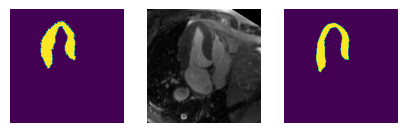

/data/groups/public/archive/radiology/multimodal_raw/Dataset034_MMWHSMRI/imagesTr/WHSMR_0x2_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset034_MMWHSMRI/labelsTr/WHSMR_0x2.nii.gz nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetPlans__2d/fold_0/validation/WHSMR_0x2.nii.gz
(220, 220)
(220, 220, 1)
(220, 220, 1)


<Figure size 640x480 with 0 Axes>

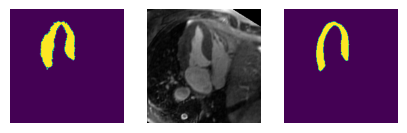

/data/groups/public/archive/radiology/multimodal_raw/Dataset034_MMWHSMRI/imagesTr/WHSMR_0x3_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset034_MMWHSMRI/labelsTr/WHSMR_0x3.nii.gz nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetPlans__2d/fold_0/validation/WHSMR_0x3.nii.gz
(220, 220)
(220, 220, 1)
(220, 220, 1)


<Figure size 640x480 with 0 Axes>

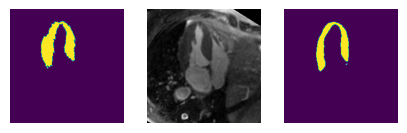

/data/groups/public/archive/radiology/multimodal_raw/Dataset034_MMWHSMRI/imagesTr/WHSMR_0x4_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset034_MMWHSMRI/labelsTr/WHSMR_0x4.nii.gz nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetPlans__2d/fold_0/validation/WHSMR_0x4.nii.gz
(220, 220)
(220, 220, 1)
(220, 220, 1)


<Figure size 640x480 with 0 Axes>

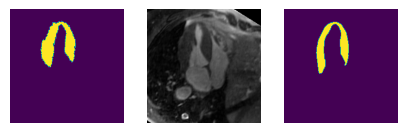

In [16]:
np.random.seed(42)
# Load the image and label NIfTI files
# res = [f for f in glob.glob("*.txt") if "abc" in f or "123" in f or "a1b" in f]
image_file_path_0 = glob.glob("/data/groups/public/archive/radiology/multimodal_raw/Dataset034_MMWHSMRI/imagesTr/WHSMR_0x*.nii.gz")
image_file_path_1 = glob.glob("/data/groups/public/archive/radiology/multimodal_raw/Dataset034_MMWHSMRI/imagesTr/WHSMR_9x*.nii.gz")
image_file_path_2 = glob.glob("/data/groups/public/archive/radiology/multimodal_raw/Dataset034_MMWHSMRI/imagesTr/WHSMR_15x*.nii.gz")

label_file_path_0 = glob.glob("/data/groups/public/archive/radiology/multimodal_raw/Dataset034_MMWHSMRI/labelsTr/WHSMR_0x*.nii.gz")
label_file_path_1 = glob.glob("/data/groups/public/archive/radiology/multimodal_raw/Dataset034_MMWHSMRI/labelsTr/WHSMR_9x*.nii.gz")
label_file_path_2 = glob.glob("/data/groups/public/archive/radiology/multimodal_raw/Dataset034_MMWHSMRI/labelsTr/WHSMR_15x*.nii.gz")

image_file_path = image_file_path_0 + image_file_path_1 + image_file_path_2
label_file_path = label_file_path_0 + label_file_path_1 + label_file_path_2
# print(image)

file_path = 'nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetPlans__2d/fold_0/validation/'
validation_results = sorted(glob.glob(os.path.join(file_path, "*")))

MRI_images = sorted(image_file_path)
MRI_labels = sorted(label_file_path)
# print(MRI_labels[0])
print(validation_results)
print(MRI_images)
print(MRI_labels)


i = 0
for image_file, label_file, res in zip(MRI_images, MRI_labels, validation_results):
# for res in validation_results:
    print(image_file, label_file, res)
    image = nib.load(image_file)
    label = nib.load(label_file)
    res_file = nib.load(res)

    image_data = image.get_fdata()
    label_data = label.get_fdata()
    res_data = res_file.get_fdata()
    print(res_data.shape)
    print(image_data.shape)
    print(label_data.shape)
    fig = plt.figure("visualize")
    plt.figure(figsize=(5, 2.5))
    plt.subplot(1, 3, 1)
    plt.axis("off")
    plt.imshow(label_data)
    plt.subplot(1, 3, 2)
    plt.axis("off")
    plt.imshow(image_data, cmap="gray")
    plt.subplot(1, 3, 3)
    plt.axis("off")
    plt.imshow(res_data)
    plt.show()
    
    if i == 10:
        break
    else:
        i += 1

(220, 220)
(220, 220, 1)
(220, 220, 1)


<Figure size 640x480 with 0 Axes>

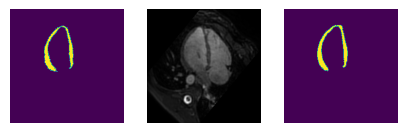

In [17]:

image_file ="/data/groups/public/archive/radiology/multimodal_raw/Dataset034_MMWHSMRI/imagesTr/WHSMR_15x4_0000.nii.gz"
label_file = "/data/groups/public/archive/radiology/multimodal_raw/Dataset034_MMWHSMRI/labelsTr/WHSMR_15x4.nii.gz"
res = 'nnUNet_results/Dataset034_MMWHSMRI/nnUNetTrainer__nnUNetPlans__2d/fold_0/validation/WHSMR_15x4.nii.gz'
image = nib.load(image_file)
label = nib.load(label_file)
res_file = nib.load(res)

image_data = image.get_fdata()
label_data = label.get_fdata()
res_data = res_file.get_fdata()
print(res_data.shape)
print(image_data.shape)
print(label_data.shape)
fig = plt.figure("visualize")
plt.figure(figsize=(5, 2.5))
plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(label_data)
plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(image_data, cmap="gray")
plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(res_data)
plt.show()

# Visualize valdiation CHAOS

['nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x0.nii.gz', 'nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x1.nii.gz', 'nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x10.nii.gz', 'nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x11.nii.gz', 'nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x12.nii.gz', 'nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x13.nii.gz', 'nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x14.nii.gz', 'nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x15.nii.gz', 'nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x16.nii.gz', 'nnUNet_results/Dataset035_CHAOST1/nnU

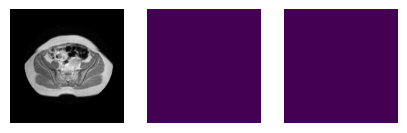

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x10_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x1.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x1.nii.gz


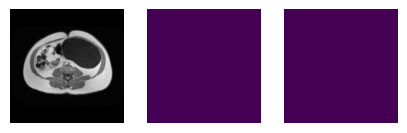

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x11_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x10.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x10.nii.gz


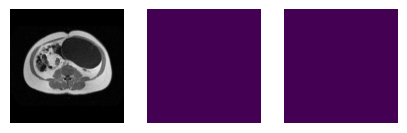

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x12_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x11.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x11.nii.gz


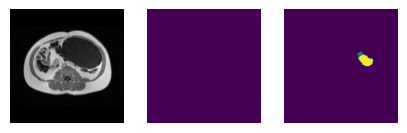

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x13_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x12.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x12.nii.gz


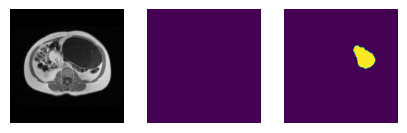

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x14_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x13.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x13.nii.gz


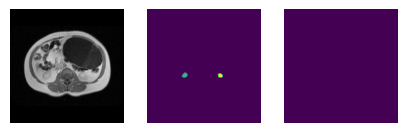

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x15_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x14.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x14.nii.gz


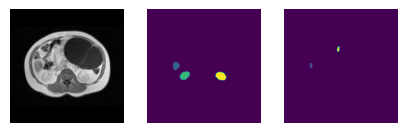

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x16_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x15.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x15.nii.gz


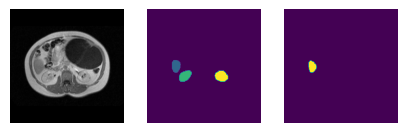

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x17_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x16.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x16.nii.gz


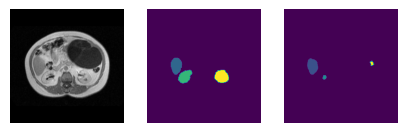

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x18_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x17.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x17.nii.gz


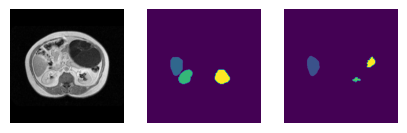

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x19_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x18.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x18.nii.gz


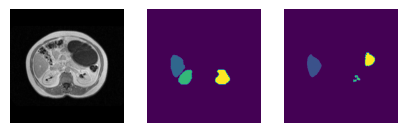

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x1_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x19.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x19.nii.gz


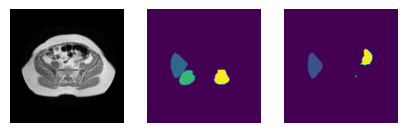

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x20_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x2.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x2.nii.gz


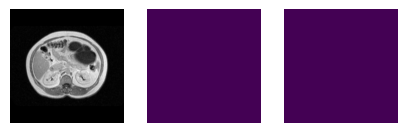

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x21_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x20.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x20.nii.gz


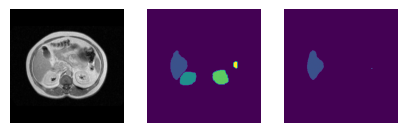

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x22_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x21.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x21.nii.gz


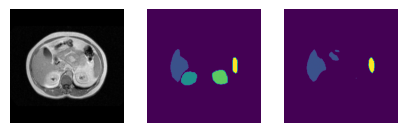

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x23_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x22.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x22.nii.gz


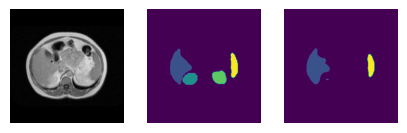

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x24_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x23.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x23.nii.gz


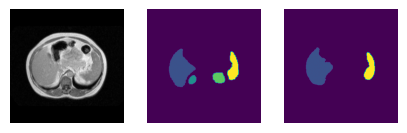

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x25_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x24.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x24.nii.gz


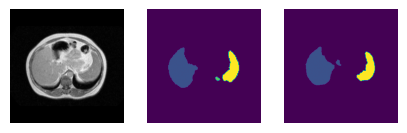

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x26_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x25.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x25.nii.gz


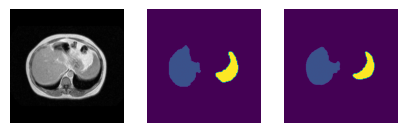

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x27_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x26.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x26.nii.gz


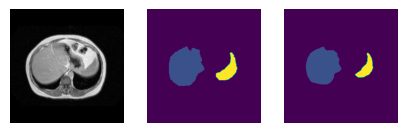

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x28_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x27.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x27.nii.gz


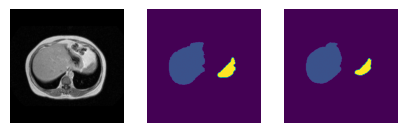

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x29_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x28.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x28.nii.gz


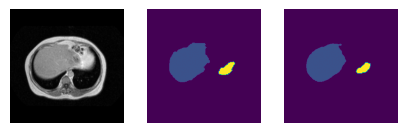

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x2_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x29.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x29.nii.gz


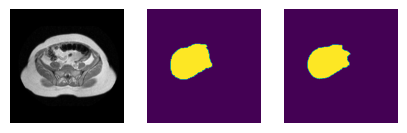

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x30_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x3.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x3.nii.gz


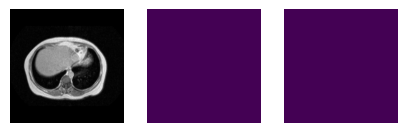

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x31_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x30.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x30.nii.gz


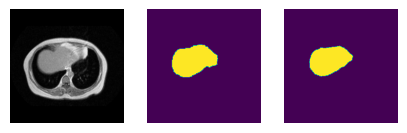

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x32_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x31.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x31.nii.gz


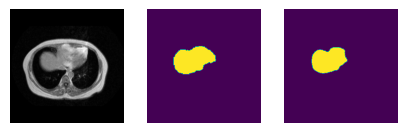

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x33_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x32.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x32.nii.gz


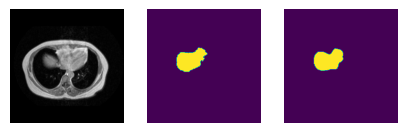

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x34_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x33.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x33.nii.gz


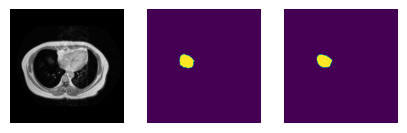

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x35_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x34.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x34.nii.gz


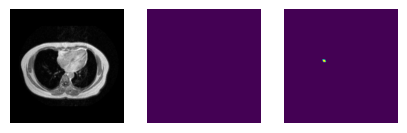

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x36_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x35.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x35.nii.gz


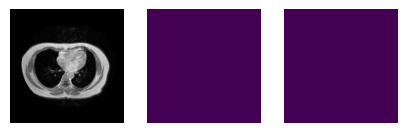

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x37_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x36.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x36.nii.gz


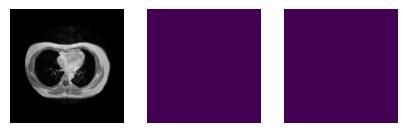

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x3_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x37.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x37.nii.gz


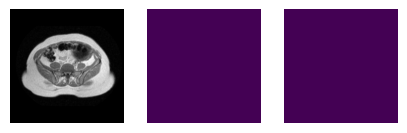

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x4_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x4.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x4.nii.gz


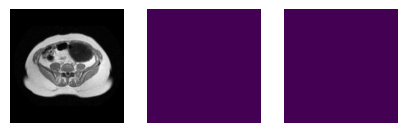

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x5_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x5.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x5.nii.gz


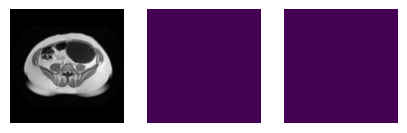

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x6_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x6.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x6.nii.gz


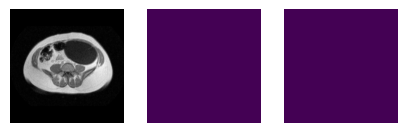

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x7_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x7.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x7.nii.gz


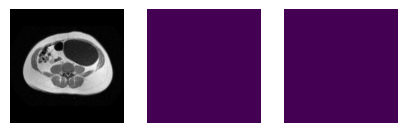

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x8_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x8.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x8.nii.gz


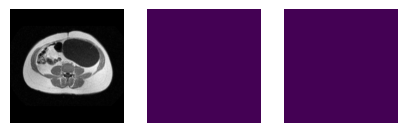

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x9_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x9.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_14x9.nii.gz


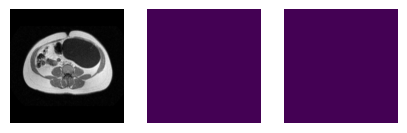

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_17x0_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_17x0.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_17x0.nii.gz


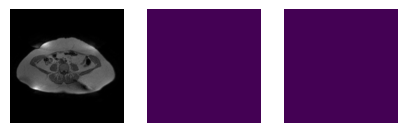

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_17x10_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_17x1.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_17x1.nii.gz


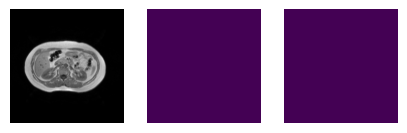

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_17x11_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_17x10.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_17x10.nii.gz


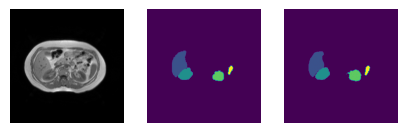

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_17x12_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_17x11.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_17x11.nii.gz


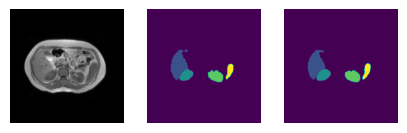

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_17x13_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_17x12.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_17x12.nii.gz


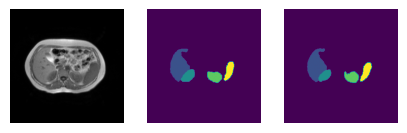

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_17x14_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_17x13.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_17x13.nii.gz


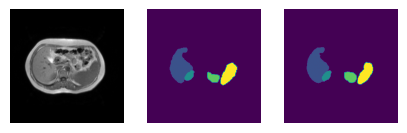

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_17x15_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_17x14.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_17x14.nii.gz


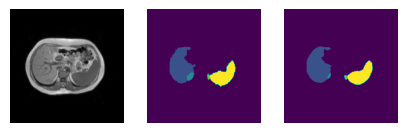

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_17x16_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_17x15.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_17x15.nii.gz


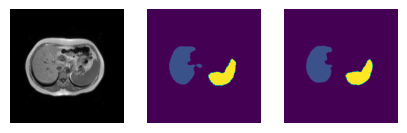

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_17x17_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_17x16.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_17x16.nii.gz


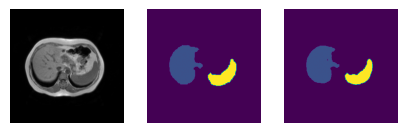

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_17x18_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_17x17.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_17x17.nii.gz


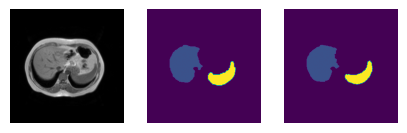

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_17x19_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_17x18.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_17x18.nii.gz


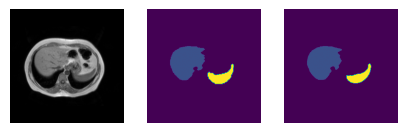

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_17x1_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_17x19.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_17x19.nii.gz


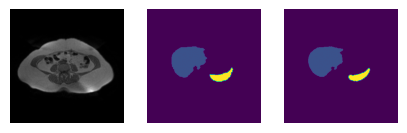

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_17x20_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_17x2.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_17x2.nii.gz


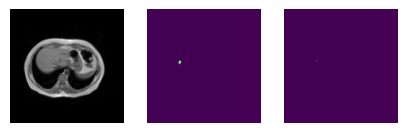

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_17x21_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_17x20.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_17x20.nii.gz


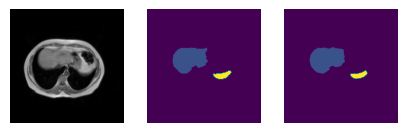

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_17x22_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_17x21.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_17x21.nii.gz


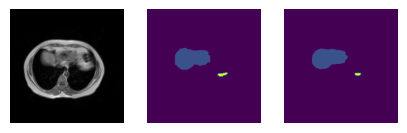

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_17x23_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_17x22.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_17x22.nii.gz


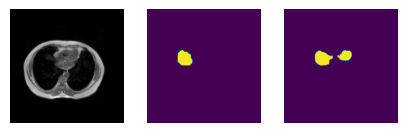

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_17x24_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_17x23.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_17x23.nii.gz


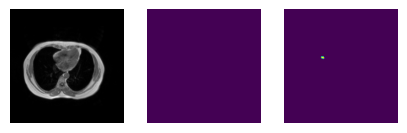

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_17x25_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_17x24.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_17x24.nii.gz


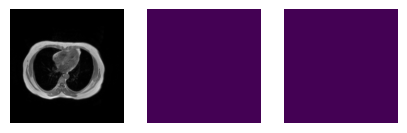

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_17x2_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_17x25.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_17x25.nii.gz


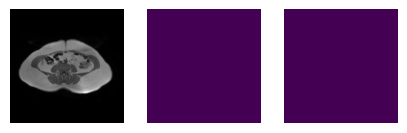

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_17x3_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_17x3.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_17x3.nii.gz


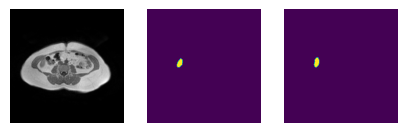

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_17x4_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_17x4.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_17x4.nii.gz


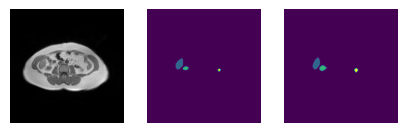

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_17x5_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_17x5.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_17x5.nii.gz


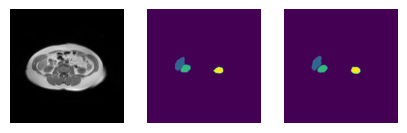

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_17x6_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_17x6.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_17x6.nii.gz


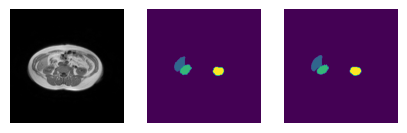

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_17x7_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_17x7.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_17x7.nii.gz


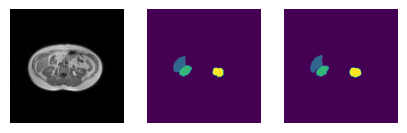

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_17x8_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_17x8.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_17x8.nii.gz


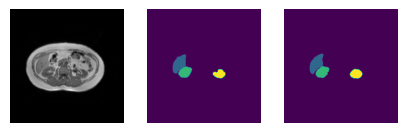

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_17x9_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_17x9.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_17x9.nii.gz


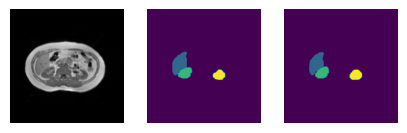

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_6x0_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_6x0.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_6x0.nii.gz


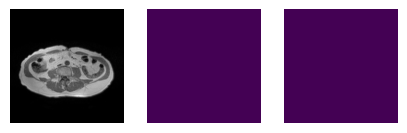

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_6x10_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_6x1.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_6x1.nii.gz


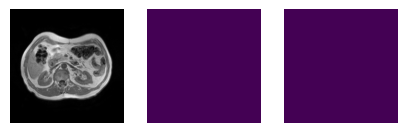

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_6x11_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_6x10.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_6x10.nii.gz


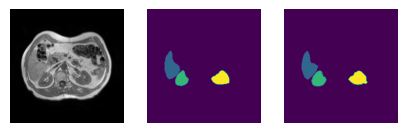

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_6x12_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_6x11.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_6x11.nii.gz


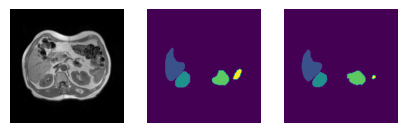

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_6x13_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_6x12.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_6x12.nii.gz


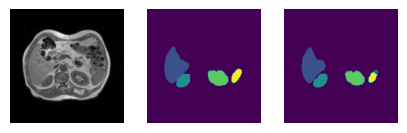

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_6x14_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_6x13.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_6x13.nii.gz


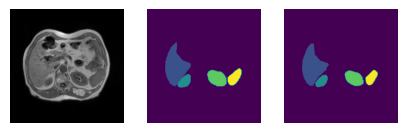

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_6x15_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_6x14.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_6x14.nii.gz


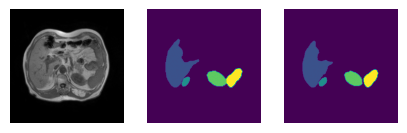

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_6x16_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_6x15.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_6x15.nii.gz


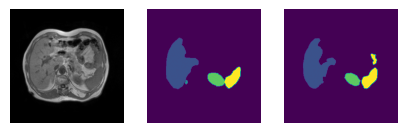

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_6x17_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_6x16.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_6x16.nii.gz


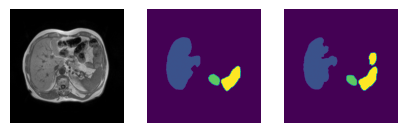

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_6x18_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_6x17.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_6x17.nii.gz


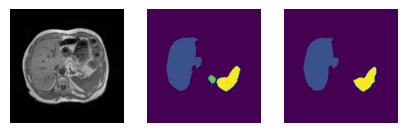

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_6x19_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_6x18.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_6x18.nii.gz


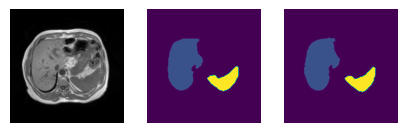

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_6x1_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_6x19.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_6x19.nii.gz


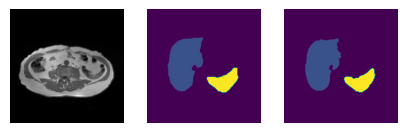

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_6x20_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_6x2.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_6x2.nii.gz


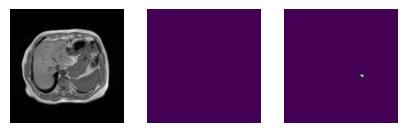

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_6x21_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_6x20.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_6x20.nii.gz


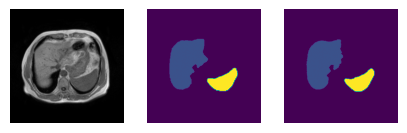

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_6x22_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_6x21.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_6x21.nii.gz


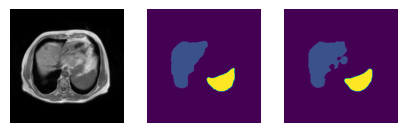

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_6x23_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_6x22.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_6x22.nii.gz


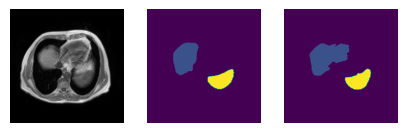

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_6x24_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_6x23.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_6x23.nii.gz


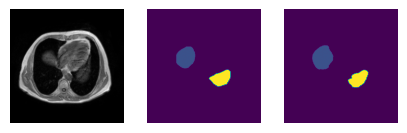

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_6x25_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_6x24.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_6x24.nii.gz


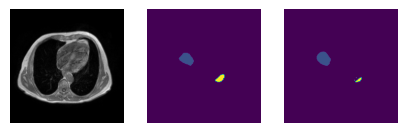

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_6x2_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_6x25.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_6x25.nii.gz


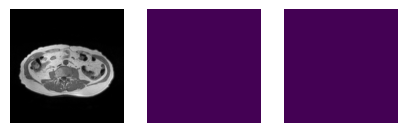

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_6x3_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_6x3.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_6x3.nii.gz


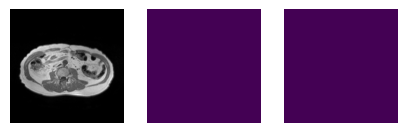

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_6x4_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_6x4.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_6x4.nii.gz


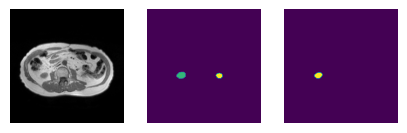

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_6x5_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_6x5.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_6x5.nii.gz


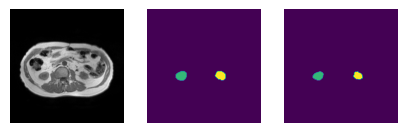

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_6x6_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_6x6.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_6x6.nii.gz


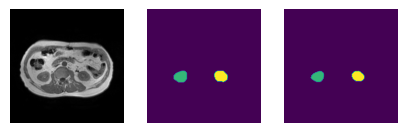

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_6x7_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_6x7.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_6x7.nii.gz


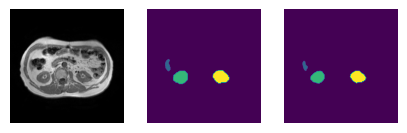

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_6x8_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_6x8.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_6x8.nii.gz


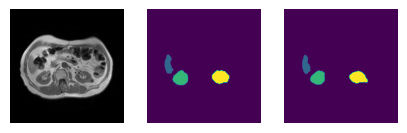

/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_6x9_0000.nii.gz /data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_6x9.nii.gz nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/CHAOST1_6x9.nii.gz


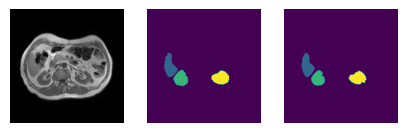

In [8]:
np.random.seed(42)
# Load the image and label NIfTI files
# res = [f for f in glob.glob("*.txt") if "abc" in f or "123" in f or "a1b" in f]
image_file_path_0 = glob.glob("/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_6x*.nii.gz")
image_file_path_1 = glob.glob("/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_14x*.nii.gz")
image_file_path_2 = glob.glob("/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/imagesTr/CHAOST1_17x*.nii.gz")

label_file_path_0 = glob.glob("/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_6x*.nii.gz")
label_file_path_1 = glob.glob("/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_14x*.nii.gz")
label_file_path_2 = glob.glob("/data/groups/public/archive/radiology/multimodal_raw/Dataset035_CHAOST1/labelsTr/CHAOST1_17x*.nii.gz")

image_file_path = image_file_path_0 + image_file_path_1 + image_file_path_2
label_file_path = label_file_path_0 + label_file_path_1 + label_file_path_2
# print(image)

file_path = 'nnUNet_results/Dataset035_CHAOST1/nnUNetTrainer__nnUNetPlans__2d/fold_3/validation/'
validation_results = sorted(glob.glob(os.path.join(file_path, "*.nii.gz")))

MRI_images = sorted(image_file_path)
MRI_labels = sorted(label_file_path)
# print(MRI_labels[0])
print(validation_results)
print(MRI_images)
print(MRI_labels)


i = 0
for image_file, label_file, res in zip(MRI_images, MRI_labels, validation_results):
# for res in validation_results:
    print(image_file, label_file, res)
    image = nib.load(image_file)
    label = nib.load(label_file)
    res_file = nib.load(res)

    image_data = image.get_fdata()
    label_data = label.get_fdata()
    res_data = res_file.get_fdata()
    plt.figure(figsize=(5, 2.5))
    plt.subplot(1, 3, 1)
    plt.axis("off")
    plt.imshow(image_data, cmap="gray")
    plt.subplot(1, 3, 2)
    plt.axis("off")
    plt.imshow(label_data)
    plt.subplot(1, 3, 3)
    plt.axis("off")
    plt.imshow(res_data)
    plt.show()
    
   